# NEED TO WRITE TESTS FOR FOUR-COMPLETION! 

In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.fourtp.examples import kk85, kk85_outer_face
from graph2plan.fourtp.four_complete import Alphas, four_complete, graph_to_four_complete
from graph2plan.fourtp.checks import check_is_k_connected
from graph2plan.fourtp.faces import get_external_face
from graph2plan.dcel.original import create_embedding

In [3]:
def create_G_and_pos(_G):
    G = nx.convert_node_labels_to_integers(_G)
    pos = {name: curr_pos for name, curr_pos in zip(G.nodes, _G.nodes)}
    nx.draw_networkx(G, pos)
    return G, pos

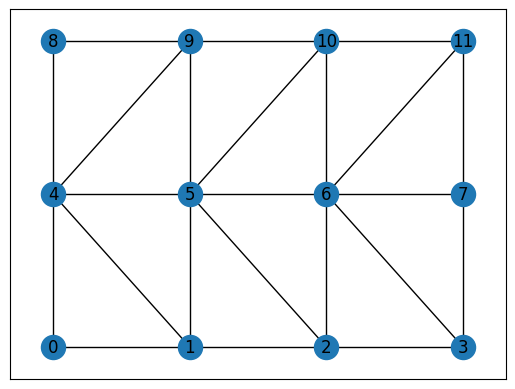

In [4]:
G, pos = create_G_and_pos(nx.triangular_lattice_graph(2,6))

[(1, 4), (4, 9)]
[(1, 0), (0, 1)]
(0.5, 0.5)
[(0, 1), (1, 2)]
(0.5, 1.5)


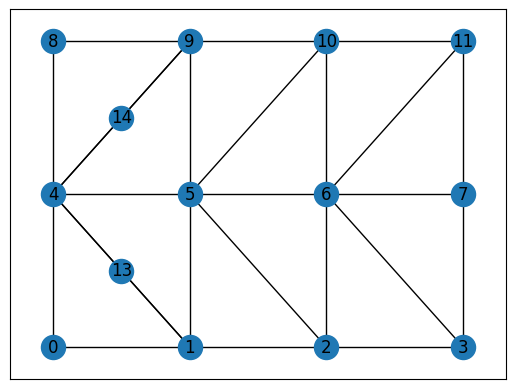

In [8]:
graph_to_four_complete(G, pos)


In [11]:
PE = create_embedding(G, pos)
PE

In [12]:
outer_face = get_external_face(PE, pos)
outer_face

[0, 1, 2, 3, 7, 11, 10, 9, 8, 4]

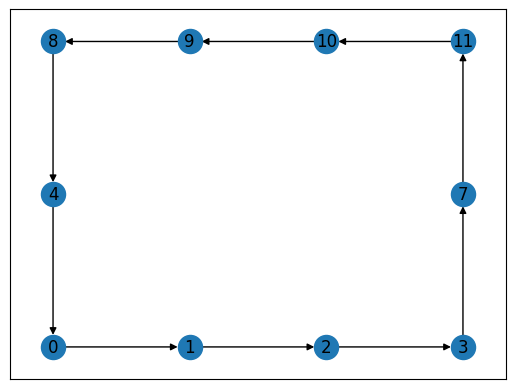

In [13]:
DG_outer = nx.cycle_graph(outer_face, nx.DiGraph)
G_outer = nx.cycle_graph(outer_face, nx.Graph)
nx.draw_networkx(DG_outer, pos)

In [16]:
nx.shortest_path(G_outer, 4,9)

[4, 8, 9]

In [65]:
u = 1
v = 4
start = list(DG_outer.successors(u))[0]
end = v
nx.shortest_path(DG_outer, start, end)


[2, 3, 7, 11, 10, 9, 8, 4]